In [1]:
from load_hpo_results import load_hpo_result_dataset
import pandas as pd
from hydra import initialize, compose

pn1 = 'full_fine_tuning_50epochs_edge_paper_final2'
pn2 = 'full_fine_tuning_50epochs_paper_final2'
pn3 = 'full_fine_tuning_50epochs_budget'
final_data1 = load_hpo_result_dataset(pn1, pn2, pn3)
df1 = pd.DataFrame(final_data1)
df1['ft_strategy'] = 'FFT (50 epochs)'

pn1 = 'full_fine_tuning_5epochs_edge_article1'
pn2 = 'full_fine_tuning_5epochs_article1'
pn3 = 'none'
final_data2 = load_hpo_result_dataset(pn1, pn2, pn3)
df2 = pd.DataFrame(final_data2)
df2['ft_strategy'] = 'FFT (5 epochs)'

pn1 = 'linearprobe_50epochs_edge_paper_final2'
pn2 = 'linearprobe_50epochs_paper_final2'
pn3 = 'linearprobe_50epochs_budget'
final_data3 = load_hpo_result_dataset(pn1, pn2, pn3)
df3 = pd.DataFrame(final_data3)
df3['ft_strategy'] = 'LP (50 epochs)'

serialized_values CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2
HEY
serialized_values CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2
serialized_values CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2
HEY
serialized_values CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2
serialized_values deit_small_patch16_224.fb_in1k_uc-merced-land-use-dataset_TRADES_v2
HEY
serialized_values deit_small_patch16_224.fb_in1k_uc-merced-land-use-dataset_TRADES_v2
serialized_values robust_resnet50_uc-merced-land-use-dataset_TRADES_v2
HEY
serialized_values robust_resnet50_uc-merced-land-use-dataset_TRADES_v2
serialized_values vit_small_patch16_224.augreg_in21k_uc-merced-land-use-dataset_TRADES_v2
HEY
serialized_values vit_small_patch16_224.augreg_in21k_uc-merced-land-use-dataset_TRADES_v2
serialized_values convnext_base.fb_in1k_uc-merced-land-use-dataset_TRADES_v2
HEY
serialized_va

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.concat([df1,df2,df3])
sub = df.copy()
sub['nb_trials'] = sub['nb_trials'].map(lambda x: x - 200 if x > 200 else x)

sub["restart_from"] = "job1_hpo.sh"
sub = sub[ ["backbone","dataset","loss_function","restart_from", "nb_trials", "ft_strategy"] ]

test = sub[ (sub.nb_trials<3) & (sub.ft_strategy == "FFT (50 epochs)")  ]
test.to_csv("./more_budget_FFT50epochs.csv")
print(test.shape)

test = sub[ (sub.nb_trials<3) & (sub.ft_strategy == "LP (50 epochs)")  ]
test.to_csv("./more_budget_LP50epochs.csv")
print(test.shape)

(12, 6)
(16, 6)


nb of problems 28


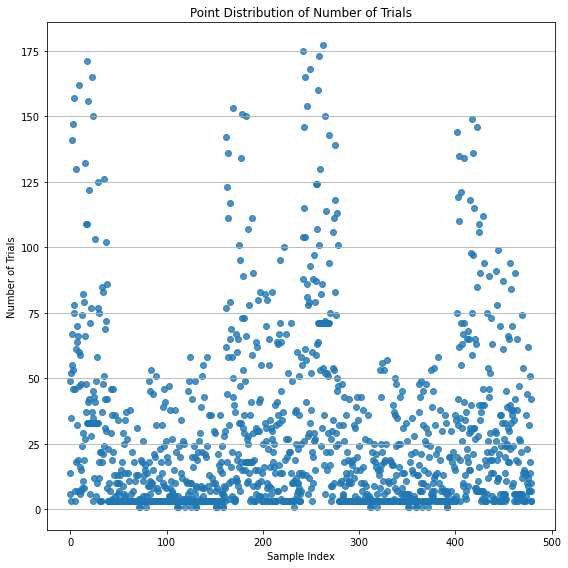

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

print( 'nb of problems', sub [ sub.nb_trials == 1 ].shape[0] )

# Strip plot to show individual point distribution of nb_trials
plt.figure(figsize=(8, 8))
plt.scatter(sub.index, sub["nb_trials"], alpha=0.8)
plt.xlabel("Sample Index")
plt.ylabel("Number of Trials")
plt.title("Point Distribution of Number of Trials")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

nb of problems 28


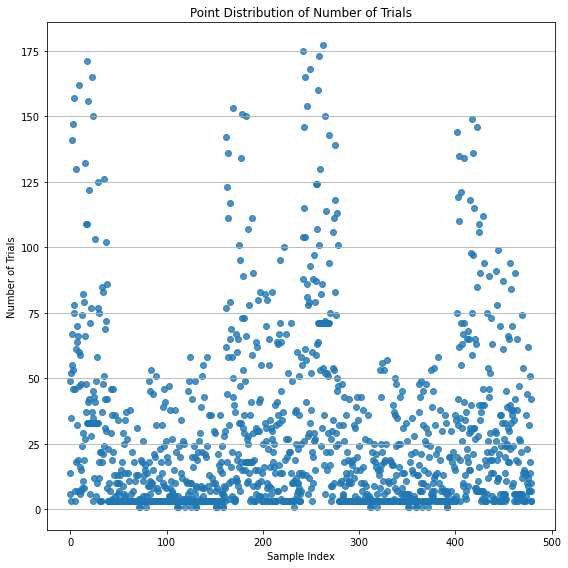

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

print( 'nb of problems', sub [ sub.nb_trials == 1 ].shape[0] )

# Strip plot to show individual point distribution of nb_trials
plt.figure(figsize=(8, 8))
plt.scatter(sub.index, sub["nb_trials"], alpha=0.8)
plt.xlabel("Sample Index")
plt.ylabel("Number of Trials")
plt.title("Point Distribution of Number of Trials")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [34]:
import numpy as np 

# Count unique configurations of lr1, lr2, wd1, wd2, sched
config_cols = ['lr1', 'lr2', 'wd1', 'wd2', 'sched']
config_counts = df.groupby(config_cols).size().reset_index(name='count')
config_counts

# target_config = {
#     'lr1': 0.000122,
#     'lr2': 0.003996,
#     'wd1': 0.000001,
#     'wd2': 0.000016,
#     'sched': False
# }

# filtered_df = df[
#     np.isclose(df['lr1'], target_config['lr1'], atol=1e-6) &
#     np.isclose(df['lr2'], target_config['lr2'], atol=1e-6) &
#     np.isclose(df['wd1'], target_config['wd1'], atol=1e-6) &
#     np.isclose(df['wd2'], target_config['wd2'], atol=1e-6) &
#     (df['sched'] == target_config['sched'])
# ]

# filtered_df[filtered_df.model_size == 2]

,lr1,lr2,wd1,wd2,sched,count
0,0.001,0.000001,0.0,0.000294,True,1
1,0.001,0.000001,0.0,0.000098,True,1
2,0.001,0.000001,0.0,0.000009,True,2
3,0.001,0.000001,0.0,0.000481,False,9
4,0.001,0.000001,0.0,0.000313,True,2
5,0.001,0.000004,0.0,0.000001,False,2
6,0.001,0.000007,0.0,0.003255,True,2
7,0.001,0.000014,0.0,0.000136,False,1
8,0.001,0.000022,0.0,0.003833,True,1
9,0.001,0.000025,0.0,0.001436,True,2


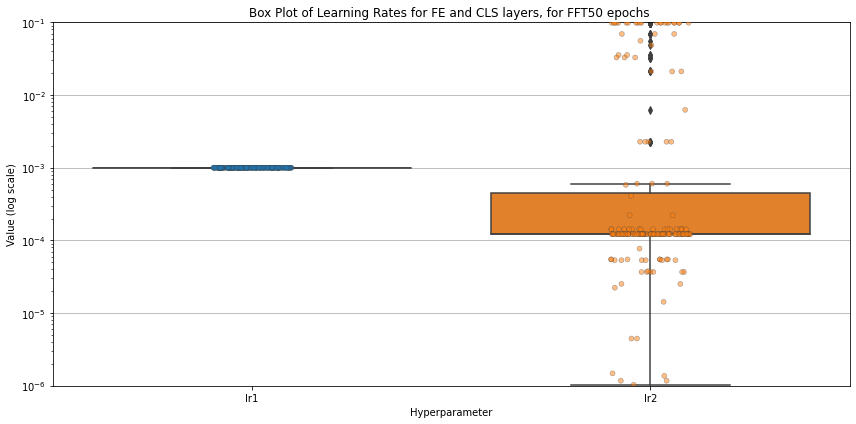

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

size = 1

df_fig = df[ df.model_size == size ]

# Filter variables of interest
variables_of_interest = ['lr1', 'lr2', 'loss_function']
data_subset = df_fig[variables_of_interest]

# Melt the dataframe to long format with respect to hyperparameters
melted_df = data_subset.melt(id_vars='loss_function', var_name='Hyperparameter', value_name='Value')

# Create the box plot with jittered dots, split by loss_function
plt.figure(figsize=(12, 6))
# sns.boxplot(x='Hyperparameter', y='Value', hue='loss_function', data=melted_df, whis=1.5)
# sns.stripplot(x='Hyperparameter', y='Value', hue='loss_function', data=melted_df,
#               dodge=True, jitter=True, alpha=0.5, marker='o', edgecolor='gray', linewidth=0.5)

sns.boxplot(x='Hyperparameter', y='Value',  data=melted_df, whis=1.5)
sns.stripplot(x='Hyperparameter', y='Value',  data=melted_df,
              dodge=True, jitter=True, alpha=0.5, marker='o', edgecolor='gray', linewidth=0.5)

plt.yscale("log")
plt.ylim(1e-6, 1e-1)
# plt.title('Box Plot of Learning Rates by Loss Function')
plt.title('Box Plot of Learning Rates for FE and CLS layers, for FFT50 epochs ')
plt.ylabel('Value (log scale)')
plt.grid(True, axis='y')
plt.tight_layout()

# Remove duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles[:2], labels[:2], title='Loss Function')

plt.show()
